In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import ticker
import os,random
import cv2
import csv

from sklearn.model_selection import train_test_split
from keras.preprocessing.image import ImageDataGenerator

Using TensorFlow backend.


In [2]:
#load image data from file and labels
#load labels
# define 8 kind of emotion,defined as one hot label
# anger-1    contempt-2    disgust-3   fear-4   happiness-5   neutral-6     sadness-7    surprise-8
def labelconvert():
    csv_file=csv.reader(open('train.csv','r'))
    x=list(csv_file)
    length=len(x)
    onehot_labels=np.zeros((length,8))
    labels=np.zeros((length))
    for i in range (0,len(x)):
        if (x[i][1]=='anger'):
            onehot_labels[i][0]=1
            labels[i]=0
        elif (x[i][1]=='contempt'):
            onehot_labels[i][1]=1
            labels[i]=1
        elif (x[i][1]=='disgust'):
            onehot_labels[i][2]=1
            labels[i]=2
        elif (x[i][1]=='fear'):
            onehot_labels[i][3]=1
            labels[i]=3
        elif (x[i][1]=='happiness'):
            onehot_labels[i][4]=1
            labels[i]=4
        elif (x[i][1]=='neutral'):
            onehot_labels[i][5]=1
            labels[i]=5
        elif (x[i][1]=='sadness'):
            onehot_labels[i][6]=1
            labels[i]=6
        elif (x[i][1]=='surprise'):
            onehot_labels[i][7]=1
            labels[i]=7
        else:
            labels[i]=0
    return onehot_labels,labels

#load images data
DATA_DIR='C:\\Users\\zhang\\Desktop\\EE599 coding\\HW4\\train_image\\'

ROWS = 224
COLS = 224
CHANNELS = 1

all_images = [DATA_DIR+i for i in os.listdir(DATA_DIR)] # use this for full dataset
#test_images =  [DATA_DIR+i for i in os.listdir(DATA_DIR) if i>=10000]


def read_image(file_path):
    img = cv2.imread(file_path,cv2.IMREAD_GRAYSCALE) #cv2.IMREAD_GRAYSCALE
    return cv2.resize(img, (ROWS, COLS), interpolation=cv2.INTER_CUBIC)

def prep_data(images):
    count = len(images)
    data = np.ndarray((count,  ROWS, COLS), dtype=np.uint8)

    for i, image_file in enumerate(images):
        image = read_image(image_file)
        data[i] = image
        if i%2000 == 0: print('Processed {} of {}'.format(i, count))
    
    return data

# get all data and labels, image data in 'data' array ,onehot labels in 'labels', number labels in 'num_labels'

data= prep_data(all_images)
labels,num_labels=labelconvert()

print("Data shape: {}".format(data.shape))

Processed 0 of 12993
Processed 2000 of 12993
Processed 4000 of 12993
Processed 6000 of 12993
Processed 8000 of 12993
Processed 10000 of 12993
Processed 12000 of 12993
Data shape: (12993, 224, 224)


In [3]:
# show image
anger= np.array([1,0,0,0,0,0,0,0])
contempt= np.array([0,1,0,0,0,0,0,0])    
disgust= np.array([0,0,1,0,0,0,0,0])   
fear= np.array([0,0,0,1,0,0,0,0])    
happiness= np.array([0,0,0,0,1,0,0,0])    
neutral= np.array([0,0,0,0,0,1,0,0])      
sadness= np.array([0,0,0,0,0,0,1,0])     
surprise= np.array([0,0,0,0,0,0,0,1]) 

# show face in datase
def show_face(data):
    img = data
    plt.imshow(img,cmap='gray')
    plt.show()

# show label name of label
def show_label(label_test):    
    if (label_test==anger).all():
        print('anger')
    elif (label_test==contempt).all():
        print('contempt')
    elif (label_test==disgust).all():
        print('disgust')
    elif (label_test==fear).all():
        print('fear')
    elif (label_test==happiness).all():
        print('happiness')
    elif (label_test==neutral).all():
        print('neutral')
    elif (label_test==sadness).all():
        print('sadness')
    elif (label_test==surprise).all():
        print('surprise')
    else:
        print('error')
    
    

### get all datas in (data), all onehot labels in (labels)  ###

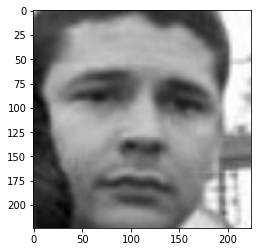

neutral


In [15]:
## data seperate by catagory
def catasep(data,label):
    

(224, 224)

In [45]:
data_use=data[0:20].reshape(20,224,224,1)
label_use=labels[0:20]
#data_new=ImageDataGenerator.apply_transform(data_use,theta=30)

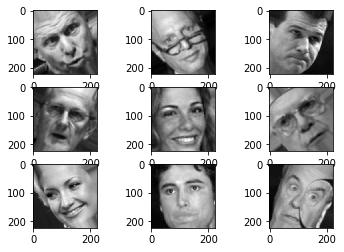

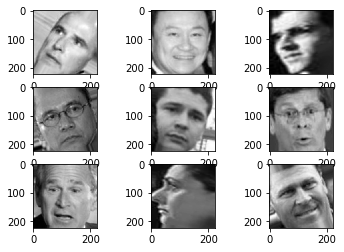

IndexError: index 2 is out of bounds for axis 0 with size 2

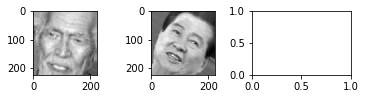

In [50]:
# Rotate images by 90 degrees
datagen = ImageDataGenerator(rotation_range=40)

# fit parameters from data
datagen.fit(data_use)

# Configure batch size and retrieve one batch of images
for X_batch, y_batch in datagen.flow(data_use, label_use, batch_size=9):
    # Show 9 images
    for i in range(0, 9):
        plt.subplot(330 + 1 + i)
        plt.imshow(X_batch[i].reshape(224,224),cmap='gray')
    # show the plot
    plt.show()

In [53]:
data_new=datagen.flow(data_use, label_use)

In [60]:
show_face(data_new.x[0].reshape(224,224))
show_face(data_use[0].reshape(224,224))

ValueError: cannot reshape array of size 8 into shape (224,224)

In [61]:
data_new?